In [1]:
import requests
import json
import xarray as xr
import pandas as pd
import datetime
import matplotlib.pyplot as plt

cora_url = 'https://beacon-cora-pr.maris.nl'
wod_url = 'https://beacon-wod.maris.nl'
argo_url = 'https://beacon-argo.maris.nl'
token = ''

Set the parameter to query for which longitude, latitude and time.

In [2]:
lon_min = -5.0
lon_max = 5.0
lat_min = 45.0
lat_max = 55.0
depth_min = 0.0
depth_max = 10.0
start_date = '1950-01-01'
end_date = '2020-01-01'

CORA PR Query

In [3]:
# Convenience function to calculate the number of days since 1950
def days_since_1950(date_str):
    # Parse the input date string to a datetime object
    input_date = datetime.datetime.strptime(date_str, '%Y-%m-%d')

    # Define the reference date: January 1, 1950
    reference_date = datetime.datetime(1950, 1, 1)

    # Calculate the difference in days
    delta = input_date - reference_date

    # Return the number of days as an integer
    return delta.days


# Building the query
cora_query = {
    "query_parameters": [
        {
            "column_name": "TEMP",
            "alias": "TEMPERATURE",
            "optional": False,
            "skip_fill_values": True
        },
        {
            "column_name": "JULD",
            "alias": "TIME"
        },
        {
            "column_name": "DEPH",
            "alias": "DEPTH"
        },
        {
            "column_name": "LONGITUDE",
            "alias": "LONGITUDE"
        },
        {
            "column_name": "LATITUDE",
            "alias": "LATITUDE"
        }
    ],
    "filters": [
        {
            "for_query_parameter": "TIME",
            "min": days_since_1950(start_date),
            "max": days_since_1950(end_date)
        },
        {
            "for_query_parameter": "DEPTH",
            "min": depth_min,
            "max": depth_max
        },
        {
            "for_query_parameter": "LONGITUDE",
            "min": lon_min,
            "max": lon_max
        },
        {
            "for_query_parameter": "LATITUDE",
            "min": lat_min,
            "max": lat_max
        },
        {
            "for_query_parameter": "TEMPERATURE",
            "min": -5,
            "max": 40
        }
    ],
    "output": {
        "format": "netcdf"
    }}

response = requests.post(f"{cora_url}/api/query", json.dumps(cora_query), headers={
    'Authorization': f'Bearer {token}',
    'Content-type': 'application/json'
})

if response.status_code != 200:
    print(response.json())

# Create file to store response content
with open('./DataOutput/combined-cora-pr-notebook-timeseries.nc', 'wb') as f:
    f.write(response.content)

# Open the netcdf file

df_cora = xr.open_dataset(
    './DataOutput/combined-cora-pr-notebook-timeseries.nc').to_dataframe()
df_cora['TIME'] = pd.to_datetime(
    df_cora['TIME'], unit='D', origin='1950-01-01')

WOD Query

In [4]:
# Convenience function to calculate the number of days since 1950
def days_since_1770(date_str):
    # Parse the input date string to a datetime object
    input_date = datetime.datetime.strptime(date_str, '%Y-%m-%d')

    # Define the reference date: January 1, 1950
    reference_date = datetime.datetime(1770, 1, 1)

    # Calculate the difference in days
    delta = input_date - reference_date

    # Return the number of days as an integer
    return delta.days

# Building the query


wod_query = {
    "query_parameters": [
        {
            "column_name": "Temperature",
            "alias": "TEMPERATURE",
            "optional": False,
            "skip_fill_values": True
        },
        {
            "column_name": "time",
            "alias": "TIME"
        },
        {
            "column_name": "z",
            "alias": "DEPTH"
        },
        {
            "column_name": "lon",
            "alias": "LONGITUDE"
        },
        {
            "column_name": "lat",
            "alias": "LATITUDE"
        }
    ],
    "filters": [
        {
            "for_query_parameter": "TIME",
            "min": days_since_1770(start_date),
            "max": days_since_1770(end_date)
        },
        {
            "for_query_parameter": "DEPTH",
            "min": depth_min,
            "max": depth_max
        },
        {
            "for_query_parameter": "LONGITUDE",
            "min": lon_min,
            "max": lon_max
        },
        {
            "for_query_parameter": "LATITUDE",
            "min": lat_min,
            "max": lat_max
        },
        {
            "for_query_parameter": "TEMPERATURE",
            "min": -5,
            "max": 40
        }
    ],
    "output": {
        "format": "netcdf"
    }}

response = requests.post(f"{wod_url}/api/query", json.dumps(wod_query), headers={
    'Authorization': f'Bearer {token}',
    'Content-type': 'application/json'
})

if response.status_code != 200:
    print(response.json())

# Create file to store response content
with open('./DataOutput/combined-wod-notebook-timeseries.nc', 'wb') as f:
    f.write(response.content)

# Open the netcdf file

df_wod = xr.open_dataset(
    './DataOutput/combined-wod-notebook-timeseries.nc').to_dataframe()
df_wod['TIME'] = pd.to_datetime(df_wod['TIME'], unit='D', origin='1770-01-01')

Argo Query

In [5]:

# Building the query
argo_query = {
    "query_parameters": [
        {
            "column_name": "TEMP",
            "alias": "TEMPERATURE",
            "optional": False,
            "skip_fill_values": True
        },
        {
            "column_name": "JULD",
            "alias": "TIME"
        },
        {
            "column_name": "PRES",
            "alias": "DEPTH"
        },
        {
            "column_name": "LONGITUDE",
            "alias": "LONGITUDE"
        },
        {
            "column_name": "LATITUDE",
            "alias": "LATITUDE"
        }
    ],
    "filters": [
        {
            "for_query_parameter": "TIME",
            "min": days_since_1950(start_date),
            "max": days_since_1950(end_date)
        },
        {
            "for_query_parameter": "DEPTH",
            "min": depth_min,
            "max": depth_max
        },
        {
            "for_query_parameter": "LONGITUDE",
            "min": lon_min,
            "max": lon_max
        },
        {
            "for_query_parameter": "LATITUDE",
            "min": lat_min,
            "max": lat_max
        },
        {
            "for_query_parameter": "TEMPERATURE",
            "min": -5,
            "max": 40
        }
    ],
    "output": {
        "format": "netcdf"
    }}

response = requests.post(f"{argo_url}/api/query", json.dumps(argo_query), headers={
    'Authorization': f'Bearer {token}',
    'Content-type': 'application/json'
})

print(response)

if response.status_code != 200:
    print(response.json())

# Create file to store response content
with open('./DataOutput/combined-argo-notebook-timeseries.nc', 'wb') as f:
    f.write(response.content)

# Open the netcdf file

df_argo = xr.open_dataset(
    './DataOutput/combined-argo-notebook-timeseries.nc').to_dataframe()
df_argo['TIME'] = pd.to_datetime(
    df_argo['TIME'], unit='D', origin='1950-01-01')

<Response [200]>


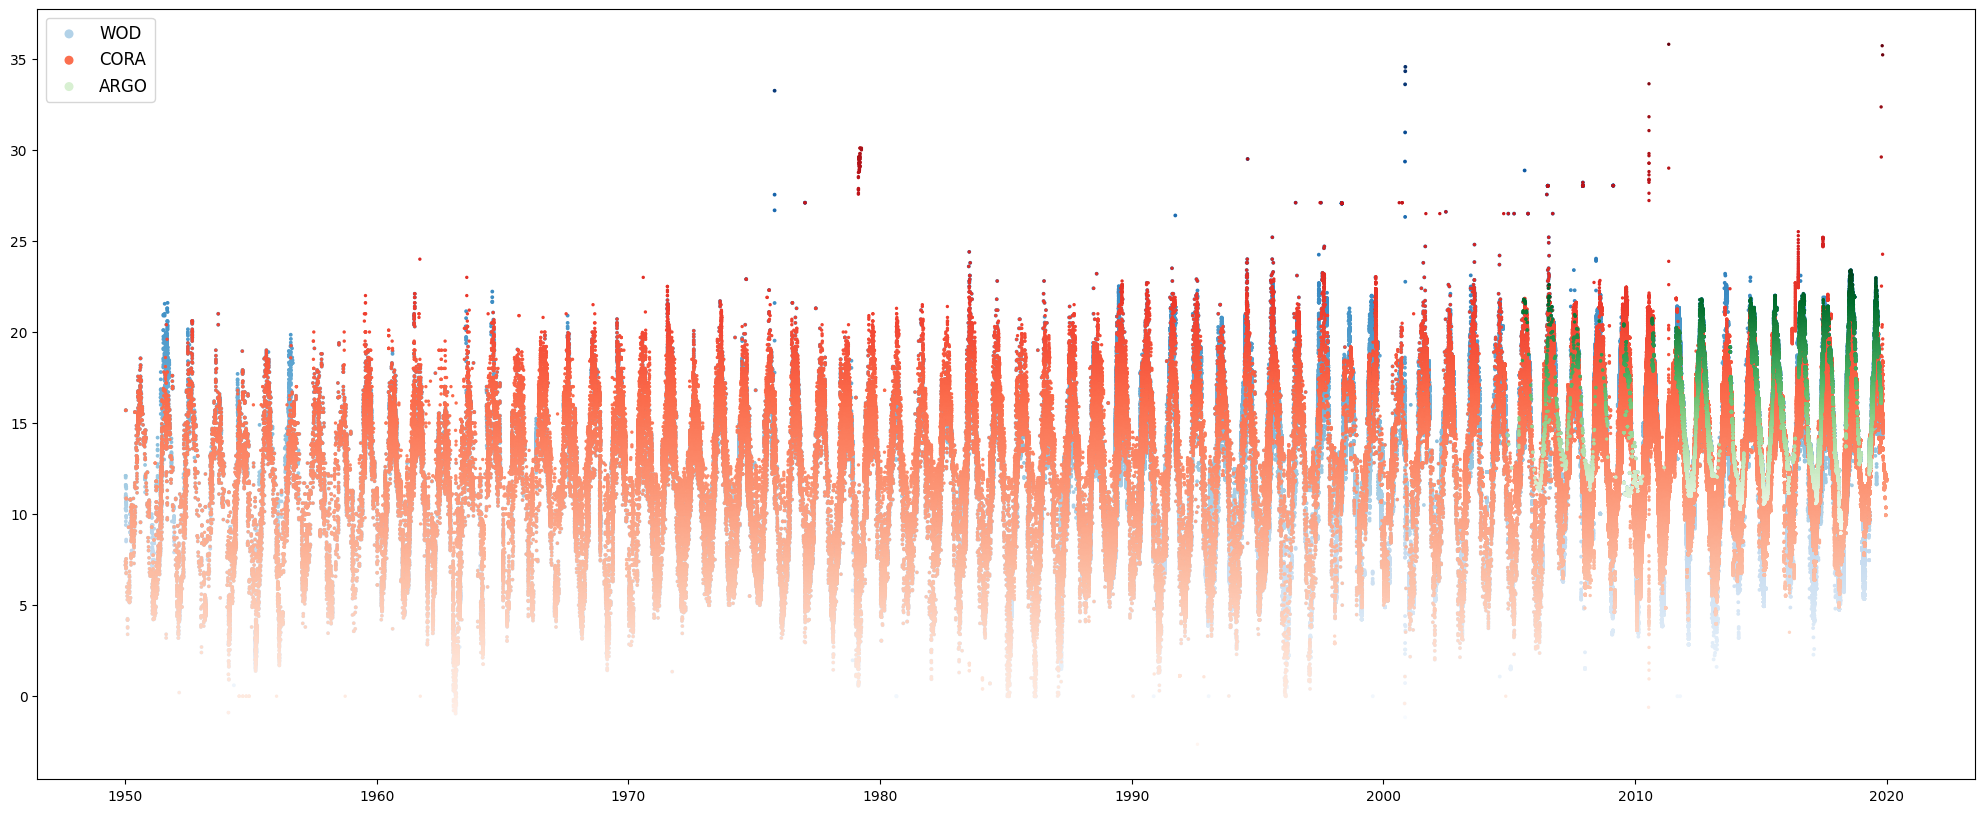

<Axes: xlabel='TIME', ylabel='TEMPERATURE'>

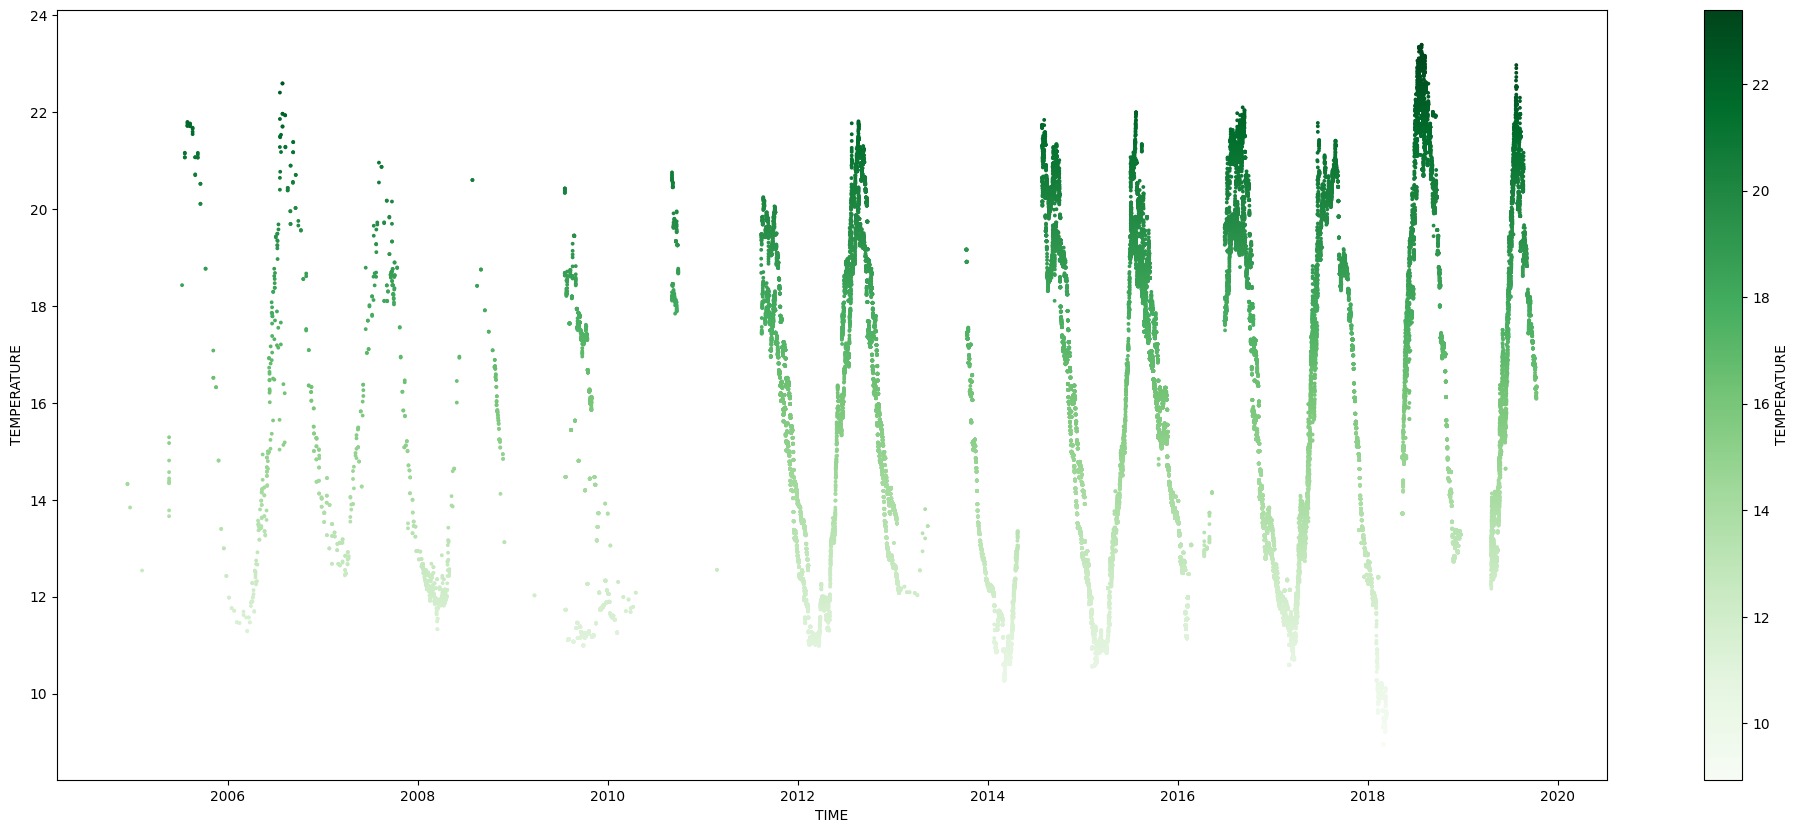

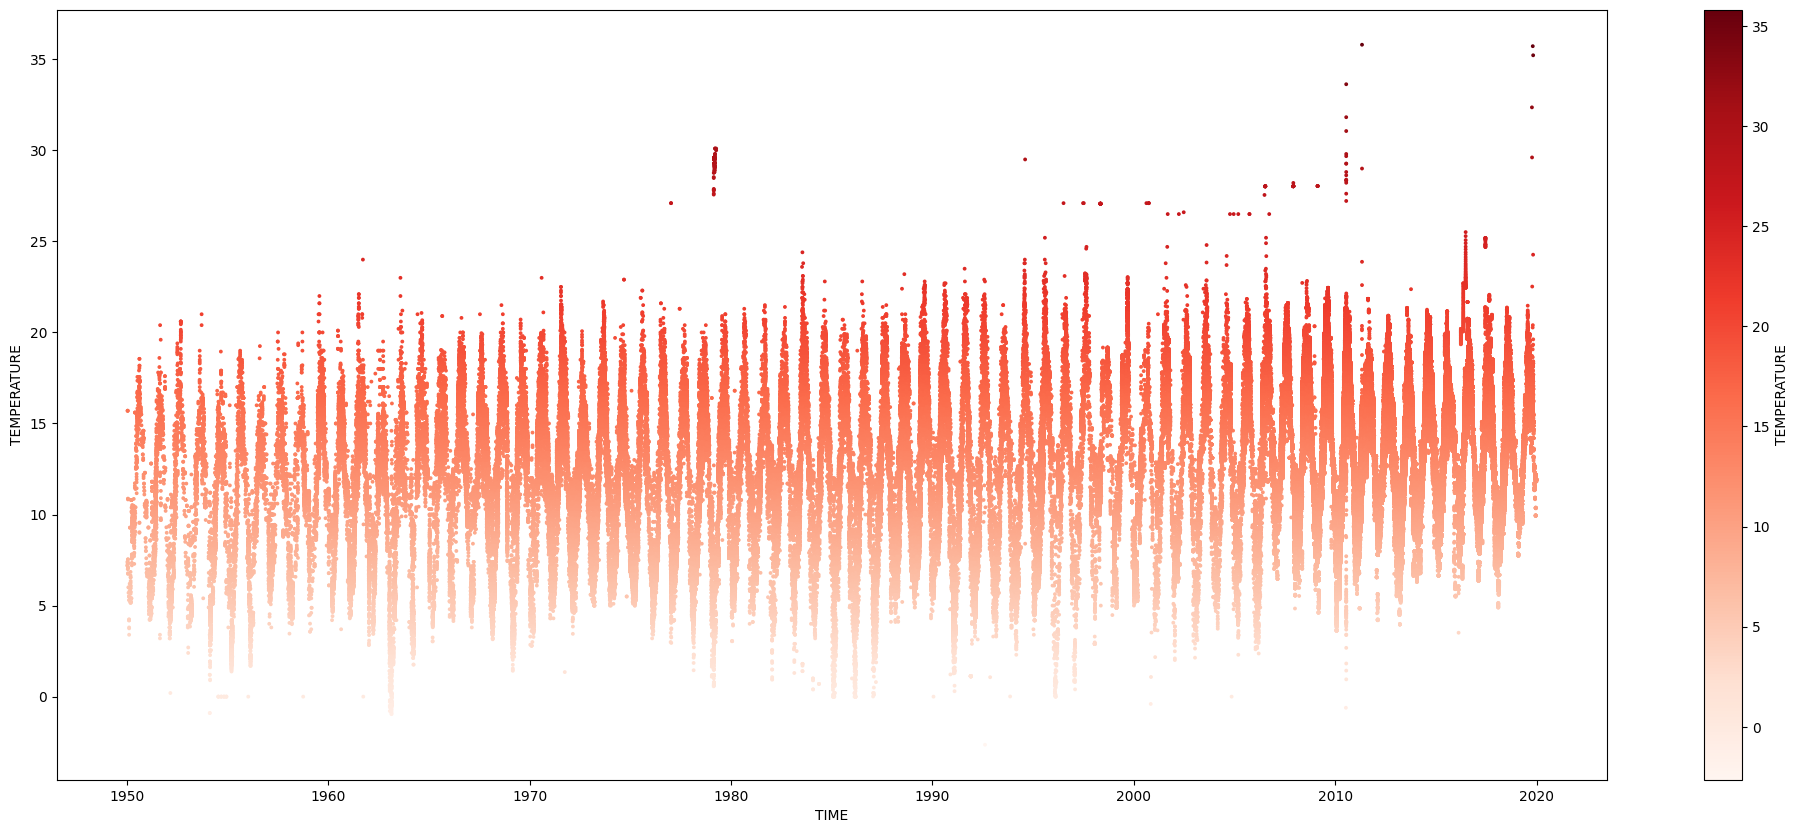

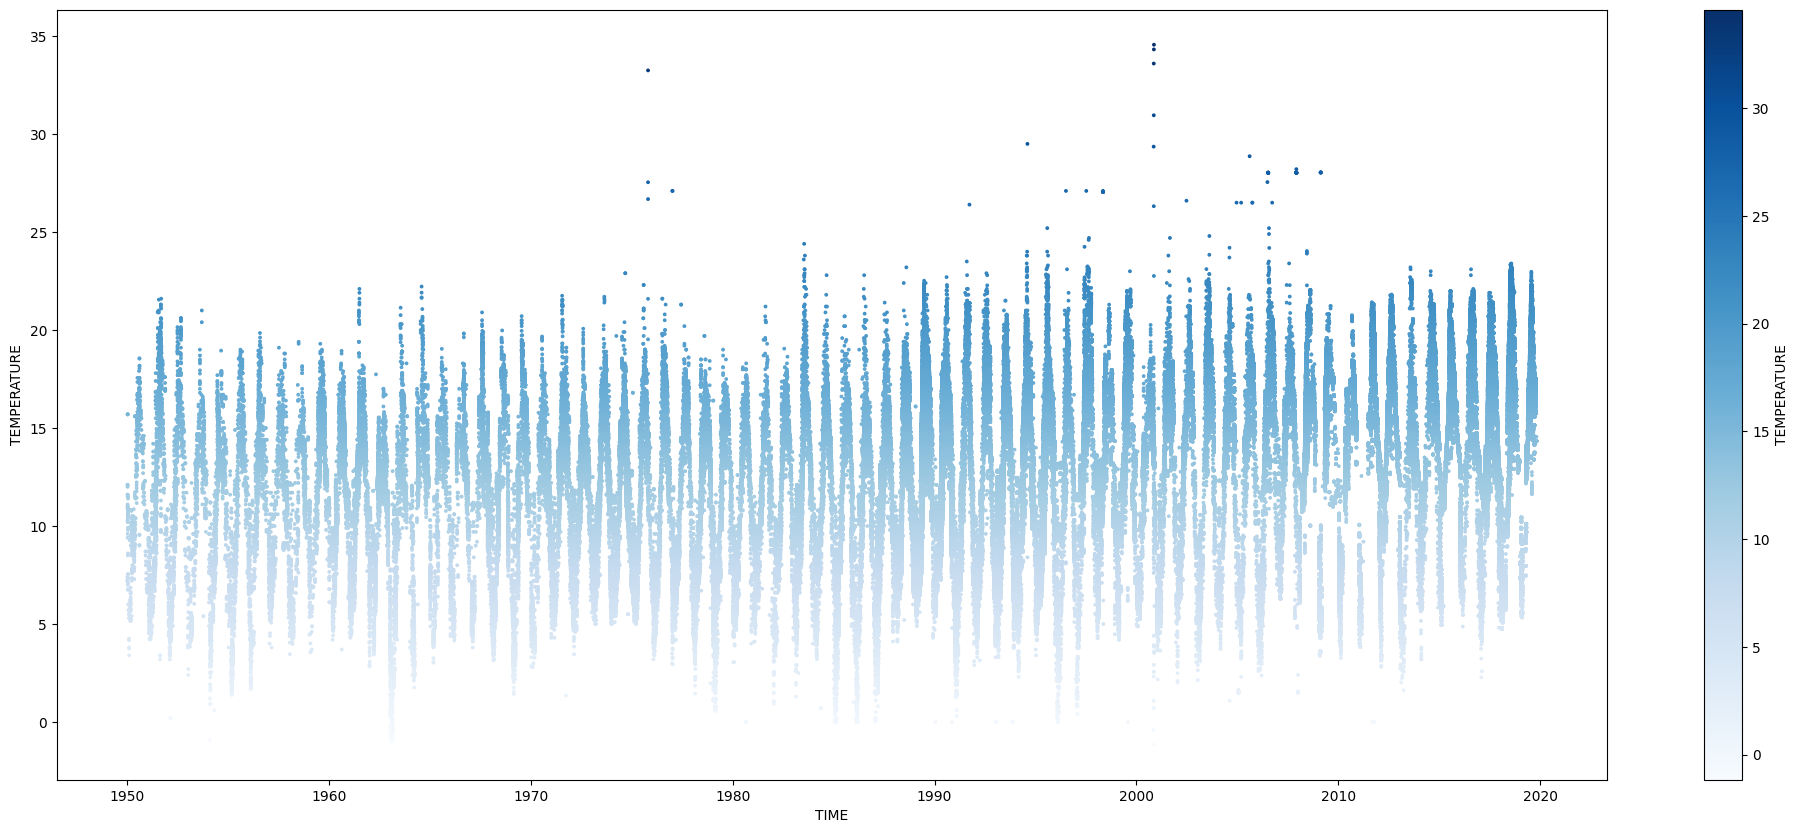

In [15]:
fig = plt.figure(figsize=(25, 10))

plt.scatter(data=df_wod, cmap='Blues', x='TIME', y='TEMPERATURE',
            c='TEMPERATURE', s=3)
plt.scatter(data=df_cora, cmap='Reds', x='TIME', y='TEMPERATURE',
            c='TEMPERATURE', s=2)
plt.scatter(data=df_argo, cmap='Greens', x='TIME', y='TEMPERATURE',
            c='TEMPERATURE', s=2)

lgnd = plt.legend(['WOD', 'CORA', 'ARGO'], prop={"size": 12})
for handle in lgnd.legend_handles:
    handle.set_sizes([30.0])

plt.show()

df_argo.plot.scatter(cmap='Greens', x='TIME', y='TEMPERATURE', c='TEMPERATURE',
                     s=3, figsize=(25, 10))

df_cora.plot.scatter(cmap='Reds', x='TIME',
                     y='TEMPERATURE', c='TEMPERATURE', s=3, figsize=(25, 10))

df_wod.plot.scatter(cmap='Blues', x='TIME',
                    y='TEMPERATURE', c='TEMPERATURE', s=3, figsize=(25, 10))